In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import seaborn as s
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier



In [3]:
data =  pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
df = data.drop('Unnamed: 32', axis=1)

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.diagnosis=df.diagnosis.astype('category')

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = df.drop(labels = 'diagnosis', axis=1)
Y = df['diagnosis']
col=X.columns

In [10]:
col

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
X.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df_norm = (X - X.mean())/ (X.max()-X.min())
df_norm = pd.concat([df_norm, Y], axis=1)

In [14]:
df_norm.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,M


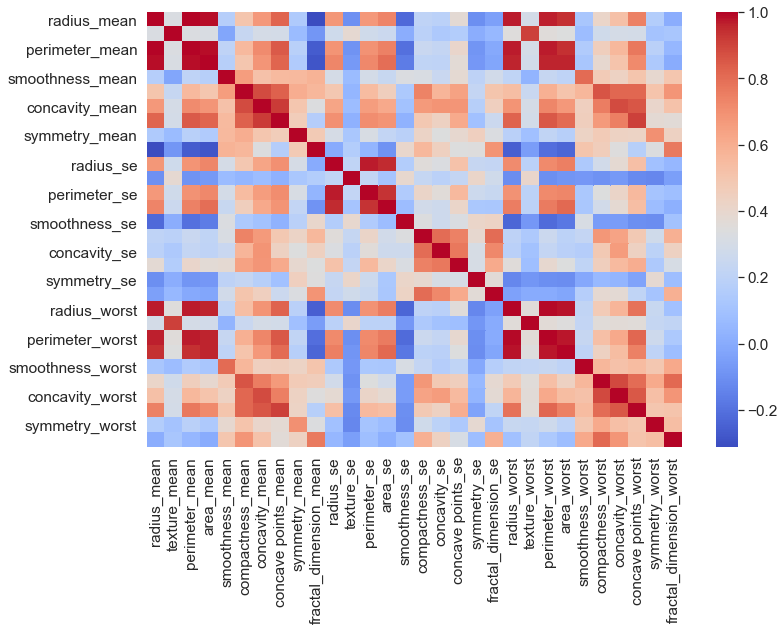

In [15]:
# Explore correlations
plt.rcParams['figure.figsize']=(12, 8)
s.set(font_scale=1.4)
s.heatmap(df.drop('diagnosis', axis=1).drop('id', axis=1).corr(), cmap='coolwarm')

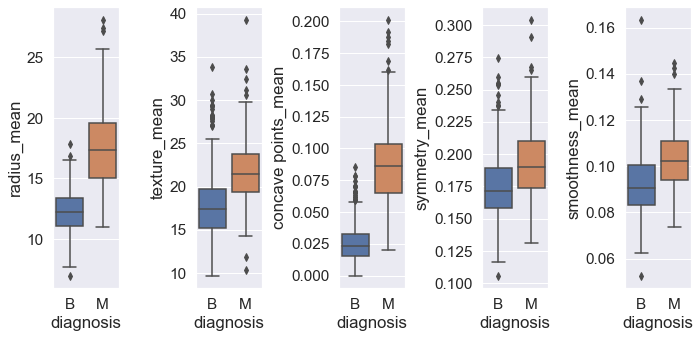

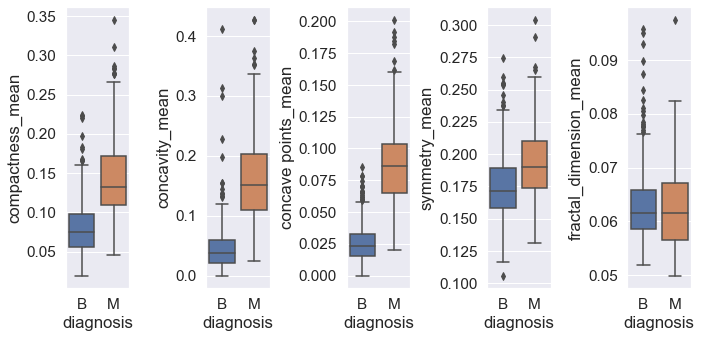

In [16]:
plt.rcParams['figure.figsize']=(10, 5)

f, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(1, 5)
s.boxplot('diagnosis', y = 'radius_mean', data = df, ax=ax1)
s.boxplot('diagnosis', y = 'texture_mean', data = df, ax=ax2)
s.boxplot('diagnosis', y = 'concave points_mean', data = df, ax=ax3)
s.boxplot('diagnosis', y = 'symmetry_mean', data = df, ax=ax4)
s.boxplot('diagnosis', y = 'smoothness_mean', data = df, ax=ax5)
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(1, 5)
s.boxplot('diagnosis', y = 'compactness_mean', data = df, ax=ax1)
s.boxplot('diagnosis', y = 'concavity_mean', data = df, ax=ax2)
s.boxplot('diagnosis', y = 'concave points_mean', data = df, ax=ax3)
s.boxplot('diagnosis', y = 'symmetry_mean', data = df, ax=ax4)
s.boxplot('diagnosis', y = 'fractal_dimension_mean', data = df, ax=ax5)
f.tight_layout()



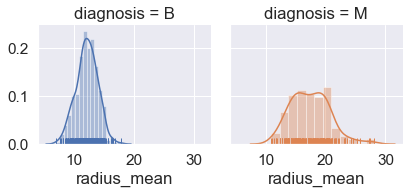

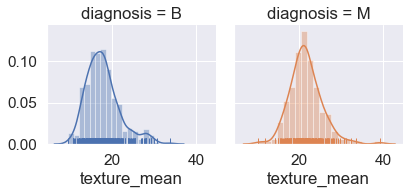

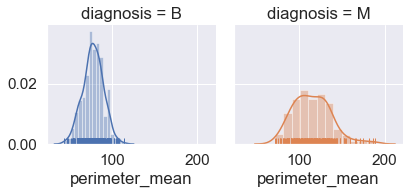

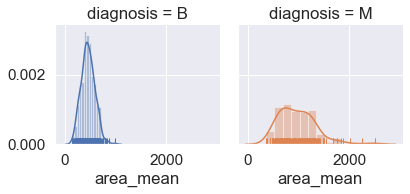

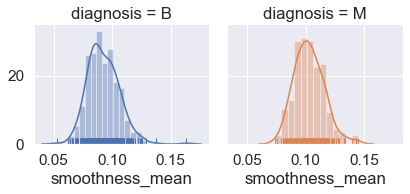

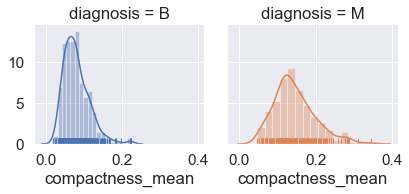

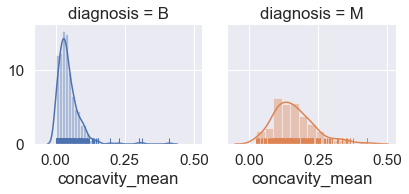

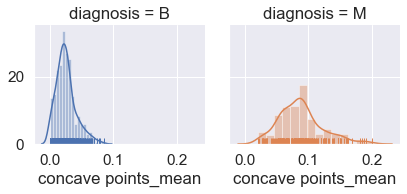

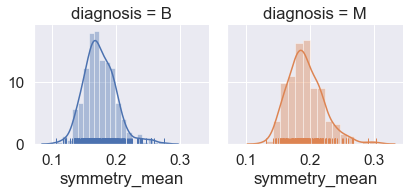

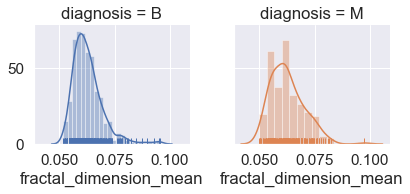

In [17]:
q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'radius_mean', hist=True, rug=True)
      
q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'texture_mean', hist=True, rug=True)

q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'perimeter_mean', hist=True, rug=True)

q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'area_mean', hist=True, rug=True)

q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'smoothness_mean', hist=True, rug=True)

q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'compactness_mean', hist=True, rug=True)

q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'concavity_mean', hist=True, rug=True)

q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'concave points_mean', hist=True, rug=True)

q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'symmetry_mean', hist=True, rug=True)

q=s.FacetGrid(df, col='diagnosis', hue='diagnosis')
q.map(s.distplot, 'fractal_dimension_mean', hist=True, rug=True)

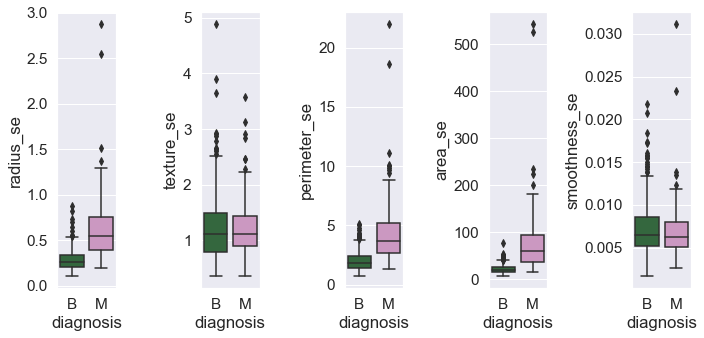

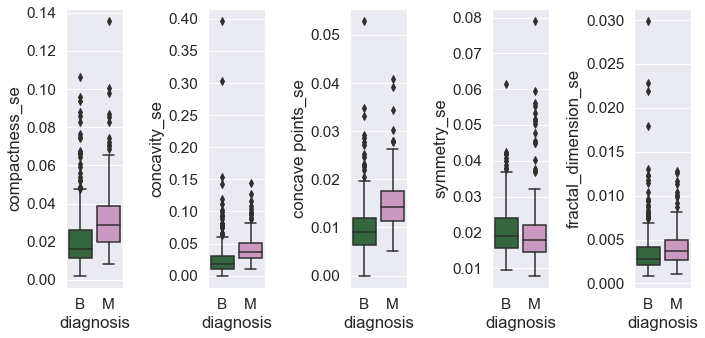

In [18]:
plt.rcParams['figure.figsize']=(10, 5)

f, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(1, 5)
s.boxplot('diagnosis', y = 'radius_se', data = df, ax=ax1, palette='cubehelix')
s.boxplot('diagnosis', y = 'texture_se', data = df, ax=ax2, palette='cubehelix')
s.boxplot('diagnosis', y = 'perimeter_se', data = df, ax=ax3, palette='cubehelix')
s.boxplot('diagnosis', y = 'area_se', data = df, ax=ax4, palette='cubehelix')
s.boxplot('diagnosis', y = 'smoothness_se', data = df, ax=ax5, palette='cubehelix')
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(1, 5)
s.boxplot('diagnosis', y = 'compactness_se', data = df, ax=ax1, palette='cubehelix')
s.boxplot('diagnosis', y = 'concavity_se', data = df, ax=ax2, palette='cubehelix')
s.boxplot('diagnosis', y = 'concave points_se', data = df, ax=ax3, palette='cubehelix')
s.boxplot('diagnosis', y = 'symmetry_se', data = df, ax=ax4, palette='cubehelix')
s.boxplot('diagnosis', y = 'fractal_dimension_se', data = df, ax=ax5, palette='cubehelix')
f.tight_layout()





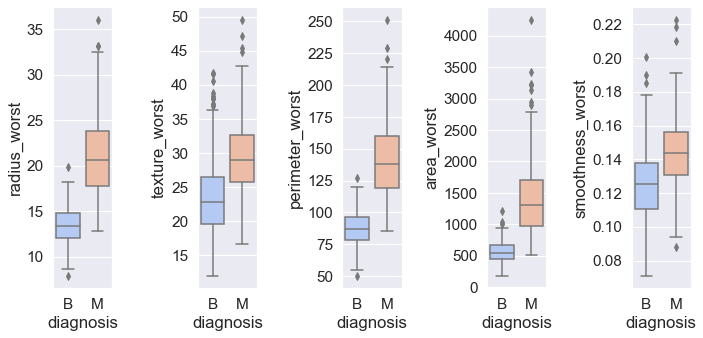

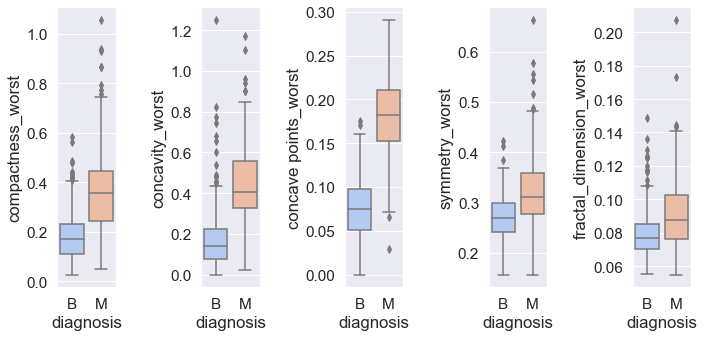

In [19]:
plt.rcParams['figure.figsize']=(10, 5)

f, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(1, 5)
s.boxplot('diagnosis', y = 'radius_worst', data = df, ax=ax1, palette='coolwarm')
s.boxplot('diagnosis', y = 'texture_worst', data = df, ax=ax2, palette='coolwarm')
s.boxplot('diagnosis', y = 'perimeter_worst', data = df, ax=ax3, palette='coolwarm')
s.boxplot('diagnosis', y = 'area_worst', data = df, ax=ax4, palette='coolwarm')
s.boxplot('diagnosis', y = 'smoothness_worst', data = df, ax=ax5, palette='coolwarm')
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(1, 5)
s.boxplot('diagnosis', y = 'compactness_worst', data = df, ax=ax1, palette='coolwarm')
s.boxplot('diagnosis', y = 'concavity_worst', data = df, ax=ax2, palette='coolwarm')
s.boxplot('diagnosis', y = 'concave points_worst', data = df, ax=ax3, palette='coolwarm')
s.boxplot('diagnosis', y = 'symmetry_worst', data = df, ax=ax4, palette='coolwarm')
s.boxplot('diagnosis', y = 'fractal_dimension_worst', data = df, ax=ax5, palette='coolwarm')
f.tight_layout()


In [20]:
X_norm = df_norm.drop(labels='diagnosis', axis=1)
Y_norm = df_norm['diagnosis']
col = X_norm.columns

le = LabelEncoder()
le.fit(Y_norm)

LabelEncoder()

In [21]:
Y_norm = le.transform(Y_norm)


In [22]:
Y_norm = pd.DataFrame(Y_norm)
Y_norm.tail(10)

,0
559,0
560,0
561,0
562,1
563,1
564,1
565,1
566,1
567,1
568,0


In [23]:
# Fitting the Model
import pickle

def FitModel(X, Y, algo_name, algorithm, gridSearchParams, cv ):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
    
    grid=GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm=confusion_matrix(y_test, pred)
    
    print(pred)
    pickle.dump(grid_result, open(algo_name, 'wb'))
    
    
    print('Best Params: ', best_params)
    print('Classification Report :' , classification_report(y_test, pred))
    print('Accuracy Score :' , str(accuracy_score(y_test, pred)))
    print('Confusion Matrix : ', cm)
    

In [24]:
# SVC
param = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

FitModel(X_norm, Y_norm, 'SVC', SVC(), param, cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s


[1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params:  {'C': 1, 'gamma': 1}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

Accuracy Score : 0.9736842105263158
Confusion Matrix :  [[72  3]
 [ 0 39]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.0s finished
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
# Random Forest
param = {
    'n_estimators': [100, 500, 1000, 2000]
}

FitModel(X, Y, 'Random Forest', RandomForestClassifier(), param, cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   51.1s finished


['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'M']
Best Params:  {'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           B       1.00      0.97      0.99        75
           M       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score : 0.9824561403508771
Confusion Matrix :  [[73  2]
 [ 0 39]]


In [26]:
np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
        
forest = RandomForestClassifier(n_estimators=1000)    
fit = forest.fit(x_train, y_train)
accuracy = fit.score(x_test, y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix(y_test, predict)
    
       
print('Accuracy of Random Forest : %s % "{0:.2%}"'.format(accuracy))

Accuracy of Random Forest : %s % "98.25%"


In [27]:
# Feature ranking:
importances = forest.feature_importances_
indices= np.argsort(importances)[::-1]

print('Feature ranking: ')
for f in range(X.shape[1]):
    print('feature %s (%f) ' % (list(X)[f], importances[indices[f]]))


Feature ranking: 
feature id (0.152947) 
feature radius_mean (0.118457) 
feature texture_mean (0.118185) 
feature perimeter_mean (0.107737) 
feature area_mean (0.082782) 
feature smoothness_mean (0.054592) 
feature compactness_mean (0.047692) 
feature concavity_mean (0.044663) 
feature concave points_mean (0.039500) 
feature symmetry_mean (0.038166) 
feature fractal_dimension_mean (0.033723) 
feature radius_se (0.017635) 
feature texture_se (0.016159) 
feature perimeter_se (0.015938) 
feature area_se (0.012447) 
feature smoothness_se (0.011327) 
feature compactness_se (0.011148) 
feature concavity_se (0.009726) 
feature concave points_se (0.009464) 
feature symmetry_se (0.006852) 
feature fractal_dimension_se (0.006291) 
feature radius_worst (0.006028) 
feature texture_worst (0.005206) 
feature perimeter_worst (0.004678) 
feature area_worst (0.004499) 
feature smoothness_worst (0.004328) 
feature compactness_worst (0.004295) 
feature concavity_worst (0.004213) 
feature concave points_w

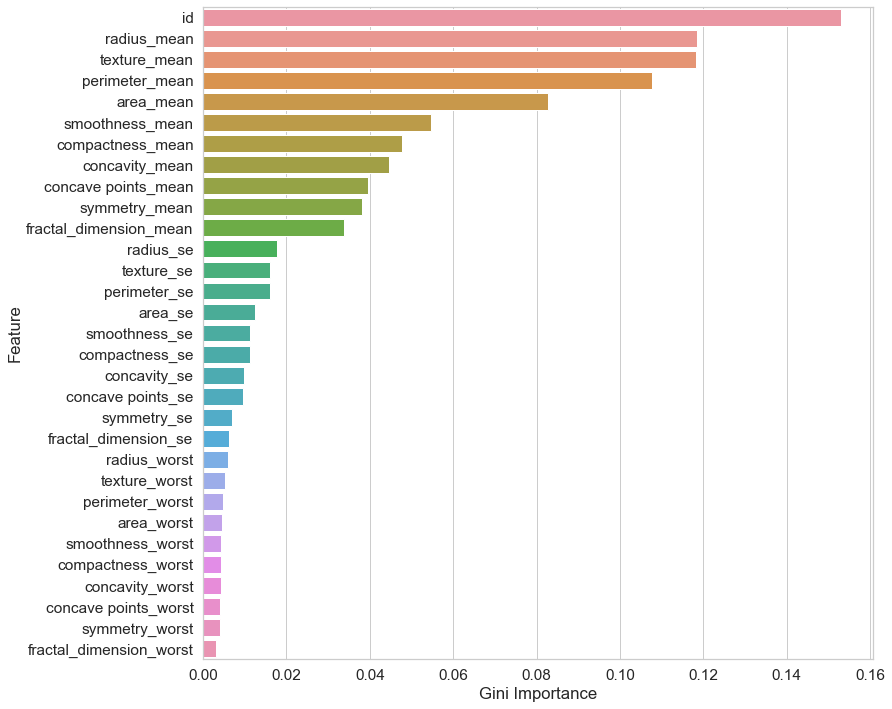

In [28]:
feat_imp = pd.DataFrame({'Feature' : list(X),
                       'Gini importance': importances[indices]})

plt.rcParams['figure.figsize']= (12, 12)
s.set_style('whitegrid')
ax= s.barplot(x='Gini importance', y= 'Feature', data= feat_imp)
ax.set(xlabel='Gini Importance')
plt.show()






In [29]:
# XGBoost

param = {
    'n_estimators': [100, 500, 1000, 2000]
}

FitModel(X, Y, 'XGBoost', XGBClassifier(), param, cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.3s finished


['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'M']
Best Params:  {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           B       0.99      0.97      0.98        75
           M       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score : 0.9736842105263158
Confusion Matrix :  [[73  2]
 [ 1 38]]


In [30]:
# Balancing the Data

df_norm.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,M


In [31]:
from imblearn.over_sampling import SMOTE
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Darwin-19.5.0-x86_64-i386-64bit
Python 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
NumPy 1.18.1
SciPy 1.4.1
Scikit-Learn 0.23.1
The scikit-learn version is 0.23.1.


In [32]:
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_norm, Y_norm)
X_res.head()
Y_res.head()

,0
0,1
1,1
2,1
3,1
4,1


In [33]:
Y_res[0].value_counts()

1    357
0    357
Name: 0, dtype: int64

In [34]:
# Random Forest + resample 
param = {
    'n_estimators' : [100, 500, 1000, 2000]
}

FitModel(X_res, Y_res, 'Random Forest', RandomForestClassifier(), param, cv=10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   44.5s finished
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params:  {'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score : 0.993006993006993
Confusion Matrix :  [[67  1]
 [ 0 75]]


In [35]:
# XGBoost + resample

param = {
    'n_estimators': [100, 500, 1000, 2000]
}

FitModel(X_res, Y_res, 'XGBoost', XGBClassifier(), param, cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.3s finished
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params:  {'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score : 0.993006993006993
Confusion Matrix :  [[67  1]
 [ 0 75]]


In [36]:
# SVC + resample
param = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

FitModel(X_res, Y_res, 'SVC', SVC(), param, cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params:  {'C': 1, 'gamma': 1}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score : 0.986013986013986
Confusion Matrix :  [[66  2]
 [ 0 75]]


[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.3s finished
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
# Feature Selection
feat_imp.index = feat_imp.Feature

In [38]:
feat_to_keep = feat_imp.iloc[1:15].index
print(feat_to_keep)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se'],
      dtype='object', name='Feature')


In [39]:
type(feat_to_keep), feat_to_keep


(pandas.core.indexes.base.Index,
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se'],
       dtype='object', name='Feature'))

In [40]:
X_res = pd.DataFrame(X_res)
Y_res = pd.DataFrame(Y_res)
X_res.columns = X_norm.columns
X_res.head()

param = {
    'n_estimators': [100, 500, 1000, 2000]
}

FitModel(X_res[feat_to_keep], Y_res, 'Random Forest', RandomForestClassifier(), param, cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   42.2s finished
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params:  {'n_estimators': 2000}
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.96      0.99      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Accuracy Score : 0.972027972027972
Confusion Matrix :  [[65  3]
 [ 1 74]]


In [43]:
# Reloading the Saved Model
loaded_model = pickle.load(open('XGBoost', 'rb'))

In [46]:
pred1 = loaded_model.predict(x_test)
loaded_model.best_params_

{'n_estimators': 500}

In [ ]:
from keras.layers import Input, Dense
input_tensor = Input(shape = (1,))
output_layers = Dense(1)
output_tensor =  Dense(1)(input_tensor)

print(input_tensor)
print(output_layers)
print(output_tensor)

In [ ]:
from keras.models import Model


model = Model(input_tensor, output_tensor)
model.compile(optimizer = 'adam', loss = 'mae')

# Import the plotting function
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

In [ ]:
import face_recognition